<h1>ALY6140 Project - Credit Card Transactions Fraud Detection</h1>

<h3>001540635 Yuri Jeong</h3>

<h2>Introduction</h2>

With Credit Card Transactions Fraud Detection Dataset, the prediction model was created to prevent future fraud transactions. It is important that the customers are not being charged for the items that they did not purchase. Also, it can help to prevent customer churn from the bank or other business sectors.

The dataset contains 23 columns such as gender, city, zip, etc., and approximately 1.2M rows. For the prediction model, there is a target column, which consists of 0 and 1. The 0 means that the transaction is not fraud, 1 for the other way around. Exploratory data analysis was conducted in the beginning of this analysis and the target column was balanced to get accurate results of prediction. Models were created utilizing classification methods like logistic regression and random forest. The models was evaluated by computing accuracy score, precision, recall, and f1 score.

<h2>Data Pre-processing</h2>

In [1]:
#import libraires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#load data set
data = pd.read_csv('/Users/yurijeong/Desktop/fraudTrain.csv')

In [3]:
# get data types for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
data.shape

(1296675, 23)

In [5]:
# first 5 rows in the data set
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


There are no null values for each column so the data points remain as original. 

In [6]:
# check null values
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
data.duplicated().any()

False

To understand the target column better, frequency table as well as bar graph and percentage pie chart were created. 

In [8]:
# frequency table for target column
table = pd.crosstab([data.is_fraud], columns = 'Count', colnames = [' '])
print(table)

            Count
is_fraud         
0         1289169
1            7506


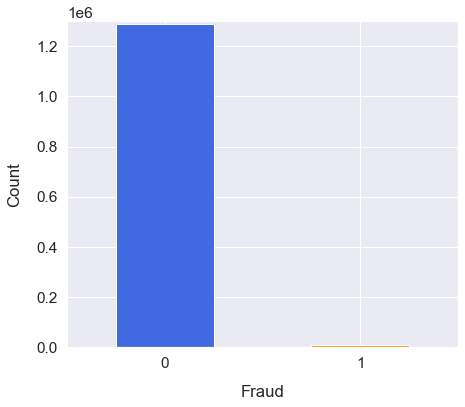

In [9]:
# barplot - fraud column yes/no counts
sns.set(font_scale=1.4)
data['is_fraud'].value_counts().plot(kind='bar', figsize =(7, 6), rot = 0, color = ['royalblue', 'darkorange'])
plt.xlabel("Fraud", labelpad = 14)
plt.ylabel("Count", labelpad = 14)
plt.ylim([0,1300000])
plt.show()

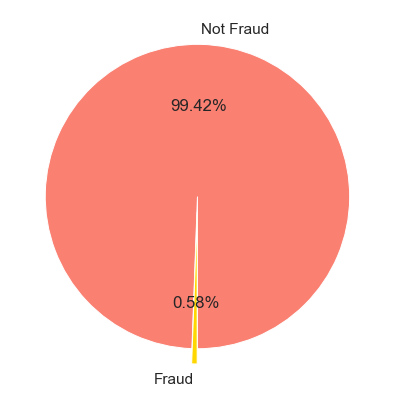

In [10]:
# pit chart - fraud column yes/no percentage
values = data.is_fraud.value_counts()
plt.figure(figsize = (7,7))
plt.pie(values, explode = (0, 0.1), autopct = '%1.2f%%', labels = ['Not Fraud', 'Fraud'], startangle = 270, colors=['salmon', 'gold'])
plt.show()

Since the date column data types were objects, it converted into datetime data types. 

In [11]:
#change string "trans_date_trans_time" in df to dateime in pandas
data['trans_date_trans_time'] = data.trans_date_trans_time.apply(pd.to_datetime)

data['year'] = data.trans_date_trans_time.apply(lambda x : x.year)
data['month'] = data.trans_date_trans_time.apply(lambda x : x.month)
data['day'] = data.trans_date_trans_time.apply(lambda x: x.day)
data['hour'] = data.trans_date_trans_time.apply(lambda x: x.hour)
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1,1,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1,1,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1,1,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1,1,0


In [12]:
np.percentile(data['amt'],99) 

545.9926000000002

Created visualizations for features - ‘amt’ column’s bar chart depending on fraud or not fraud was created. 

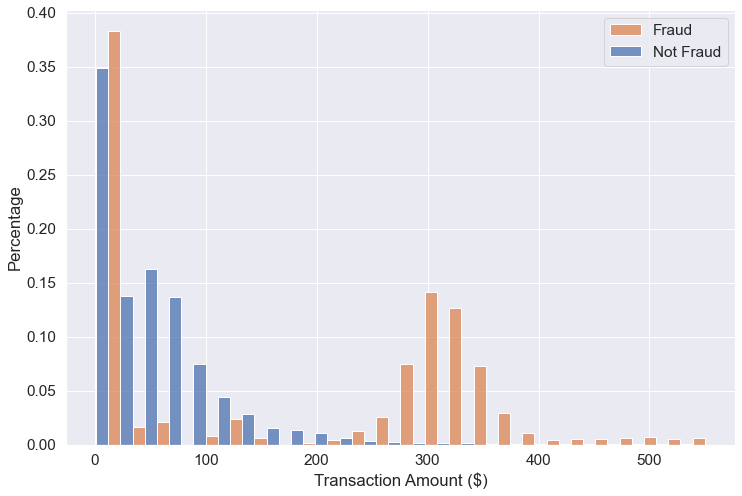

In [13]:
# fraud/not fraud percentage for each transaction amount
plt.figure(figsize = (12,8))
ax=sns.histplot(x='amt',data=data[data.amt<=550],hue='is_fraud',stat='probability',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage')
ax.set_xlabel('Transaction Amount ($)')
plt.legend(labels=['Fraud', 'Not Fraud'])
plt.show()

Monthly fraud versus not fraud percentage graph was also created to compare. 

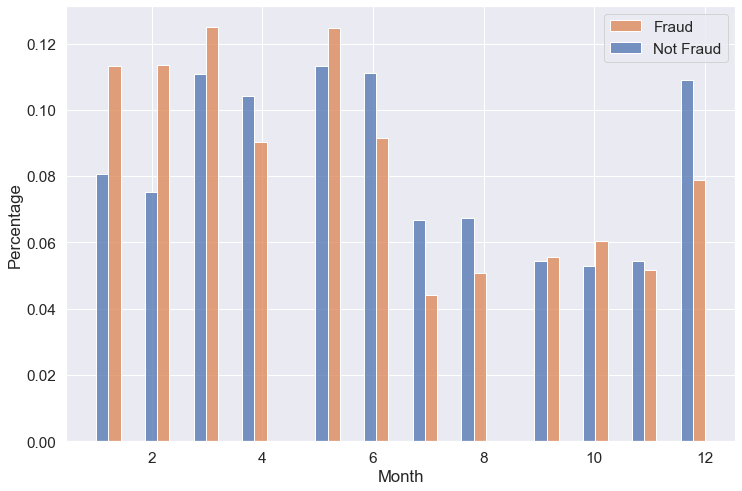

In [14]:
# monthly fraud/not fraud percentage
plt.figure(figsize = (12,8))
ax=sns.histplot(data=data, x="month", hue='is_fraud',stat='probability',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.legend( labels=['Fraud', 'Not Fraud'])
plt.show()

In [15]:
# convert categorical values to numeric values
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder(dtype=np.int64)
enc.fit(data.loc[:,['category','merchant','job','gender','city','state']])

data.loc[:, ['category','merchant','job','gender','city','state']] = enc.transform(data[['category','merchant','job','gender','city','state']])

<AxesSubplot:>

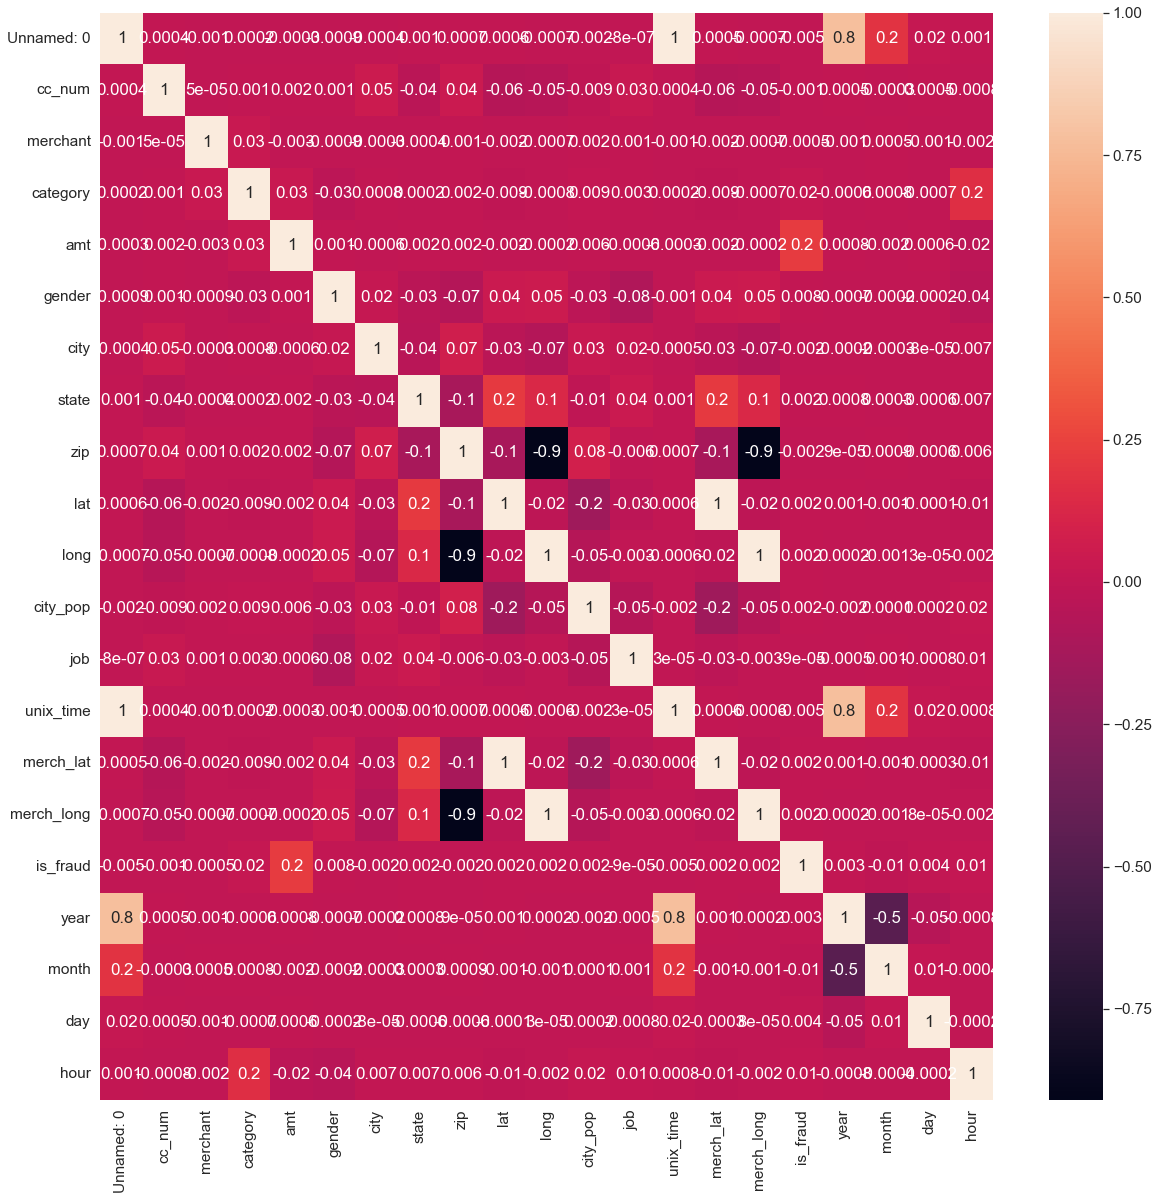

In [16]:
# create corr heatmap
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, fmt = '.1g')

Columns that might not be needed for the analysis were removed. 

In [17]:
# drop unnecessary columns
drop_columns = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'job', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time','year','day']
data.drop(drop_columns, axis=1, inplace=True)

In [18]:
data.columns

Index(['merchant', 'category', 'amt', 'gender', 'merch_lat', 'merch_long',
       'is_fraud', 'month', 'hour'],
      dtype='object')

<h2>Create Models</h2>

After exploratory data analysis, the target column ‘is_fraud’ and other features were divided into x and y.

In [19]:
# store target and features data into X, y
y_target = data['is_fraud']
X_features = data.drop(['is_fraud'], axis = 1, inplace = False)

For modeling, data was split into training and test data sets. After this process, different types of classificatiaon models such as logistic regression and random forest will be created and evaluated with precision and recall scores. 

In [20]:
# split data set into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=0)

The data is imbalanced, which is common with fraud transaction data - actual fraud cases are fewer than normal transactions. To solve this problem, SMOTE (Synthetic Minority Oversampling Technique) function was used and the data was resampled to deliver better results.

In [21]:
from imblearn.over_sampling import SMOTE

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)

<h3>Logistic Regression</h3>

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
# logistic regression
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
lr.fit(X_resampled, y_resampled)
lr_pred = lr.predict(X_test)

To evaluate the model, understanding of recall and precision are important. Recall is True Positive / (True Positive + False Negatives), meaning it measures how many fraud cases place under the radar. In the other hand, precision (True Positive/(True Positive + False Positive)) evaluates how good the model is at generating as fewer false cases as possible. For the fraud detection, high recall value requires leaving out as few fraud transactions as possible, at the same time, having high precision because a lot of false alarms can cause issues as well. 
The Logistic Regression model shows 0.75 recall and 0.04 precision; which is too many false positives (meaning it cannot predict fraud cases well), so another model was created to come up with better results.

In [30]:
# logistic regression evaluation
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95    386727
           1       0.04      0.75      0.08      2276

    accuracy                           0.90    389003
   macro avg       0.52      0.83      0.52    389003
weighted avg       0.99      0.90      0.94    389003



<h3>Decision Tree</h3>

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state = 111)
dt_clf.fit(X_resampled,y_resampled)
dt_pred = dt_clf.predict(X_test)

In [32]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    386727
           1       0.38      0.82      0.52      2276

    accuracy                           0.99    389003
   macro avg       0.69      0.90      0.76    389003
weighted avg       1.00      0.99      0.99    389003



The decision tree model shows about 34% higher score in precision than the logistic regression and the recall value increased to 82%. However, it still needs to be improved to detect fraud transactions so the random forest model was created below. 

<h3>Random Forest</h3>

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=5)
rf.fit(X_resampled,y_resampled)
predicted=rf.predict(X_test)

In [28]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386727
           1       0.52      0.84      0.64      2276

    accuracy                           0.99    389003
   macro avg       0.76      0.92      0.82    389003
weighted avg       1.00      0.99      1.00    389003



The random forest model shows higher values than decision trees in both precision and recall - 0.52 and 0.84. Hence, we can conclude that the random forest model demonstrates the best to detect fraud cases amongst other models.